In [1]:
import pandas as pd

In [2]:
DATASET = r"C:\Users\91930\Documents\GITHUB\ArtOfAI\dataset\titanic2.csv"
titanic = pd.read_csv(DATASET)

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
DATASET_AIR_QUALITY = r"C:\Users\91930\Documents\GITHUB\ArtOfAI\dataset\air_quality\air_quality_no2_long.csv"
air_quality = pd.read_csv(DATASET_AIR_QUALITY)

In [5]:
air_quality.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


# How to reshape the layout of tables

### Sort table rows

#### I want to sort the Titanic data according to the age of the passengers.

In [6]:
titanic.sort_values(by="Age").head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S


#### I want to sort the Titianic data according to the cabin class and age in descending order.

In [7]:
titanic.sort_values(by=["Pclass", "Age"], ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S


With `DataFrame.sort_values()`, the rows in the table are sorted according to the defined column(s). The index will follow the row order.

### Long to wide table format

Let's use a small subset of the air quality data set. We focus on ***NO<sub>2</sub>*** data and only use the first two measurement of each location (i.e. the head of each group). The subset of data will be called `no2_subset`.

In [31]:
# filter for no2 data only
no2 = air_quality[air_quality['parameter'] == 'no2']
no2.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [30]:
# use 2 measurements (head) for each location (groupby)
no2_subset = no2.sort_index().groupby(['location']).head(2)
no2_subset

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
1004,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,no2,41.0,µg/m³
1005,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,no2,45.0,µg/m³
1099,London,GB,2019-06-17 11:00:00+00:00,London Westminster,no2,11.0,µg/m³
1100,London,GB,2019-06-17 10:00:00+00:00,London Westminster,no2,11.0,µg/m³


In [10]:
help(no2.sort_index)

Help on method sort_index in module pandas.core.frame:

sort_index(*, axis: 'Axis' = 0, level: 'IndexLabel | None' = None, ascending: 'bool | Sequence[bool]' = True, inplace: 'bool' = False, kind: 'SortKind' = 'quicksort', na_position: 'NaPosition' = 'last', sort_remaining: 'bool' = True, ignore_index: 'bool' = False, key: 'IndexKeyFunc | None' = None) -> 'DataFrame | None' method of pandas.core.frame.DataFrame instance
    Sort object by labels (along an axis).
    
    Returns a new DataFrame sorted by label if `inplace` argument is
    ``False``, otherwise updates the original DataFrame and returns None.
    
    Parameters
    ----------
    axis : {0 or 'index', 1 or 'columns'}, default 0
        The axis along which to sort.  The value 0 identifies the rows,
        and 1 identifies the columns.
    level : int or level name or list of ints or list of level names
        If not None, sort on values in specified index level(s).
    ascending : bool or list-like of bools, default T

#### I wan the values for the three stations as separate columns next to each other.

In [11]:

no2_subset.pivot(columns="location", values="value")

location,BETR801,FR04014,London Westminster
0,NaN,20.0,NaN
1,NaN,21.8,NaN
1004,41.0,NaN,NaN
1005,45.0,NaN,NaN
1099,NaN,NaN,11.0
1100,NaN,NaN,11.0


A `pivot()` function is purely reshaping of the data: a single value for each index/column combination is required.

In [12]:
help(no2_subset.pivot)

Help on method pivot in module pandas.core.frame:

pivot(*, columns, index=<no_default>, values=<no_default>) -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Return reshaped DataFrame organized by given index / column values.
    
    Reshape data (produce a "pivot" table) based on column values. Uses
    unique values from specified `index` / `columns` to form axes of the
    resulting DataFrame. This function does not support data
    aggregation, multiple values will result in a MultiIndex in the
    columns. See the :ref:`User Guide <reshaping>` for more on reshaping.
    
    Parameters
    ----------
    columns : str or object or a list of str
        Column to use to make new frame's columns.
    index : str or object or a list of str, optional
        Column to use to make new frame's index. If not given, uses existing index.
    values : str, object or a list of the previous, optional
        Column(s) to use for populating new frame's values. If not
       

As pandas supports plotting of multiple columns out of the box, the conversion from *long* to *wide* table format enables the plotting of the different times series at the same time.

In [13]:
no2.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


<Axes: >

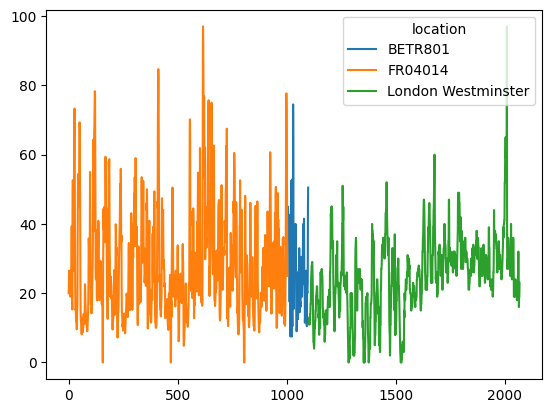

In [14]:
no2.pivot(columns="location", values="value").plot()

**Note**: When the `index` parameter is not defined, the existing index (row labels) is used.

### Pivot table

#### I want the mean concentrations for **NO<sub>2</sub>** and **PM<sub>2.5</sub>** in each of the stations in table form.

In [15]:
air_quality.pivot_table(
    values='value', index='location', columns='parameter', aggfunc='mean'
)

parameter,no2
location,
BETR801,25.778947
FR04014,27.740538
London Westminster,24.777090


In the case of `pivot()`, the data is  only rearranged. when multiple values need to be aggregated (in this specific case, the values on different time steps), `pivot table()` can be used providing an aggregation function (e.g. mean) on how to combine these values.

Pivot table is a well known concept in spreadsheet software. When interested in the row/column margins (subtotals) for each variable, set the `margins` parameter to `True`.

In [16]:
air_quality.pivot_table(
    values="value",
    index="location",
    columns="parameter",
    aggfunc="mean",
    margins=True,
)

parameter,no2,All
location,,
BETR801,25.778947,25.778947
FR04014,27.740538,27.740538
London Westminster,24.777090,24.777090
All,26.261847,26.261847


The `pivot_table()` is indeed directly linked to `groupby`. The same result can be derived by grouping on both `parameter` and `location`:

In [17]:
air_quality.groupby(['parameter','location'])[['value']].mean()

value
parameter location                     
no2       BETR801             25.778947
          FR04014             27.740538
          London Westminster  24.777090

### Wide to long format

Starting again from the wide format table created in the previous section, we add a new index to the `DataFrame` with `reset_index()`.

In [32]:
no2.head(2)

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³


In [35]:
no2_pivoted = no2.pivot(columns="location", values="value").reset_index()


In [36]:
no2_pivoted.head(2)

location,index,BETR801,FR04014,London Westminster
0,0,NaN,20.0,NaN
1,1,NaN,21.8,NaN


#### I want to collect all air quatlity **NO<sub>2</sub>** measurements in a single column (long format).

In [37]:
# not working
# no_2 = no2_pivoted.melt(id_vars="date.utc") 

no_2 = no2_pivoted.melt()
no_2.head()

,location,value
0,index,0.0
1,index,1.0
2,index,2.0
3,index,3.0
4,index,4.0


The `pandas.melt()` method on a `DataFrame` converts the data table from wide format to long format. The column headers become the variable names in a newly created column.

The column is the short version on how to apply `pandas.melt()`. The method iwll *melt* all columns NOT mentioned in  `id_vars` together into two columns: A column with the column header names and a column with the values itself. The latter column gets by default the name `value`.

The parameters passed to `pandas.melt()` can be defined in more detail:

In [39]:
no2_pivoted

location,index,BETR801,FR04014,London Westminster
0,0,NaN,20.0,NaN
1,1,NaN,21.8,NaN
2,2,NaN,26.5,NaN
3,3,NaN,24.9,NaN
4,4,NaN,21.4,NaN
...,...,...,...,...
2063,2063,NaN,NaN,26.0
2064,2064,NaN,NaN,16.0
2065,2065,NaN,NaN,19.0
2066,2066,NaN,NaN,19.0


In [41]:
# no_2 = no2_pivoted.melt(
#     id_vars="date.utc",
#     value_vars=["BETR801", "FR04014", "London Westminster"],
#     value_name="NO_2",
#     var_name="id_location",
# )


# no_2.head()

The additional parameters have the following  effects:

- `value_vars` defines which columns to *melt* together
- `value_name` provides a custom name for the values column instead of the default column name `value`.
- `var_name` provides a cutome column name for the column collecting the column headers names. Otherewise it takes the index name or a default `variable`.


Hence, the arguments `value_name` and `var_name` are just user-defined names for the two generated columns. The columns to melt are defined by `id_vars` and `value_vars`.